**Do the codeing here**

So i will be creating the sections so you can add code  and you can perform the visualization

In [1]:
#Alex---u can keep on adding the code bock if required

In [2]:
#Liu

In [3]:
import pandas as pd 
# load the two csv files
total_paper_counts_path = 'paper_counts.csv'
schist_articles_path = 'articles.schistosomiasis.csv'

# read the csv files into dataframe
total_paper_counts_df = pd.read_csv(total_paper_counts_path)
schist_articles_df = pd.read_csv(schist_articles_path)

# display the first few rows of each dataframe
total_paper_counts_df.head()
schist_articles_df.head()

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation
0,10543349,HAV and HEV infection in hospitalised hepatiti...,A total of 202 serum and stool samples from ac...,0393-2990,European journal of epidemiology,(15) 603-9,1999,M,Divizia,M,"Department of Public Health, University of Tor..."
1,10548300,Relationship between circulating antigen level...,Ninety-eight Schistosoma mansoni-infected chil...,0002-9637,The American journal of tropical medicine and ...,(61) 635-8,1999,M M,Hassan,MM,"Department of Parasitology, Faculty of Medicin..."
2,10556825,Schistosoma mansoni schistosomula reduce E-sel...,The recruitment of immune cells into the lungs...,0014-2980,European journal of immunology,(29) 3691-701,1999,F,Trottein,F,"Centre d'Immunologie et de Biologie, Parasitai..."
3,10557147,The baboon as a non-human primate model of hum...,"Over the past three decades, intensive studies...",0169-4758,Parasitology today (Personal ed.),(15) 478-82,1999,M,Nyindo,M,"Kilimanjaro Christian Medical College (KCMC), ..."
4,10559846,Antigenic stimulation is more efficient than L...,Nitric oxide (NO) is an extremely important an...,0100-879X,Brazilian journal of medical and biological re...,(32) 1437-45,1999,D M,Oliveira,DM,"Departamento de Bioqu铆mica e Imunologia, Insti..."


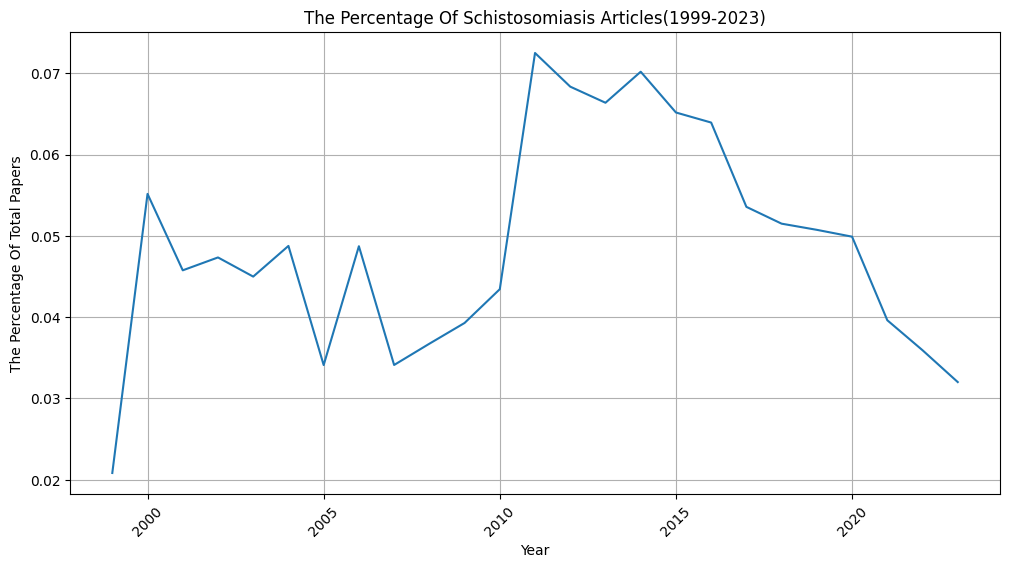

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
# Converting the 'Year' column to integers in the schistosomiasis articles dataset
schist_articles_df['Year'] = pd.to_numeric(schist_articles_df['Year'], errors='coerce')

# Counting the number of schistosomiasis research papers per year  (1999-2023)
schist_paper_counts_per_year = schist_articles_df[schist_articles_df['Year'].between(1999,2023)].groupby('Year').size().rename('SchistosomiasisPaper')

# Filtering the total paper counts for the year(1999-2023)
total_paper_counts_filtered = total_paper_counts_df[total_paper_counts_df['Year'].between(1999,2023)]

# Merging the  schistosomiasis paper counts with the total paper counts
merged_paper_counts = total_paper_counts_filtered.set_index('Year').join(schist_paper_counts_per_year, how='inner')

# Calculating the percentage of schistosomiasis papers out of total papers
merged_paper_counts['Percentage'] = (merged_paper_counts['SchistosomiasisPaper'] / merged_paper_counts['Count']) * 100

# Plotting the trend per year(1999-2023)
plt.figure(figsize=(12,6))
sns.lineplot(data = merged_paper_counts, x=merged_paper_counts.index, y='Percentage')
plt.title('The Percentage Of Schistosomiasis Articles(1999-2023)')
plt.xlabel('Year')
plt.ylabel('The Percentage Of Total Papers')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


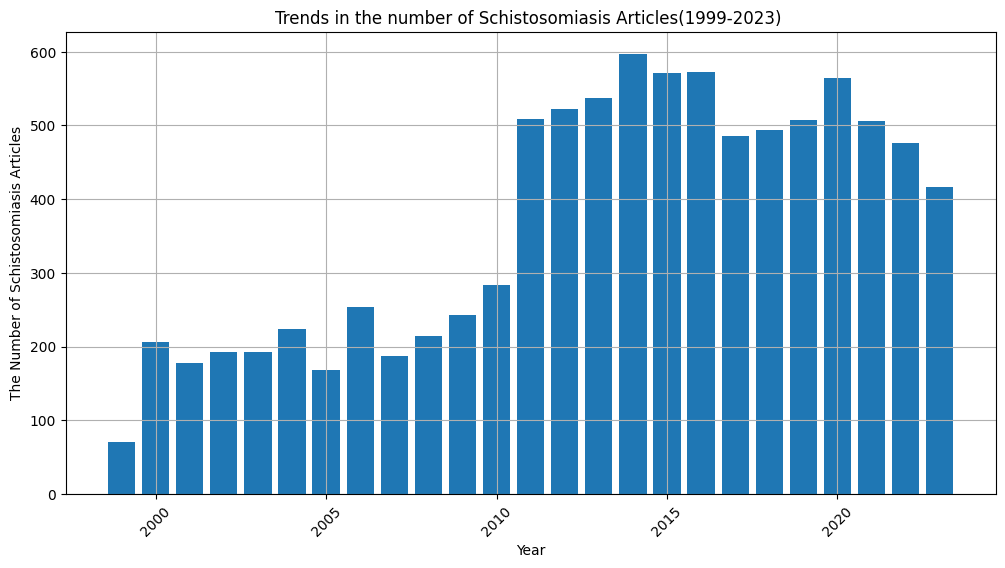

In [5]:
# Plotting the trends in the number of Schistosomiasis Articles per year(1999-2023)
plt.figure(figsize=(12,6))
plt.bar(merged_paper_counts.index,merged_paper_counts['SchistosomiasisPaper'])
plt.title('Trends in the number of Schistosomiasis Articles(1999-2023) ')
plt.xlabel('Year')
plt.ylabel('The Number of Schistosomiasis Articles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [6]:
# Convert 'Year' to numeric in articles files
schist_articles_df['Year'] = pd.to_numeric(schist_articles_df['Year'], errors='coerce')

# Filter articles from 2018 to 2023
filtered_articles_df = schist_articles_df[schist_articles_df['Year'].between(2018, 2023)]

In [18]:
# Improved extraction of country information
import re
def extract_country_improved(text):
    if not isinstance(text, str):
        return None
    text = re.sub(r'\S*@\S*\s?', '', text)
    last_part = text.split(',')[-1].strip()
    words = last_part.split('.')
    last_word_before_period = words[-2].split()[-1] if len(words) > 1 else None
    return last_word_before_period

improved_articles_countries = filtered_articles_df['FirstAuthorAffiliation'].apply(extract_country_improved).dropna()
improved_country_counts = Counter(improved_articles_countries)

# Cleaning and aggregating country names
def clean_improved_country_name(country):
    if country in ["United", "USA", "America"]:
        return "United States of America"
    if country in ["UK", "Kingdom"]:
        return "United Kingdom"
    if country == "Africa":
        return None
    
    return country
# Apply the  cleaning function to the improved country counts
cleaned_countries = [clean_improved_country_name(country) for country in improved_articles_countries]
cleaned_country_counts = Counter(filter(None, cleaned_countries))

# Creating a DataFrame from the cleaned country counts
country_stats_df = pd.DataFrame.from_dict(cleaned_country_counts, orient='index', columns=['Publications'])
country_stats_df.reset_index(inplace=True)
country_stats_df.rename(columns={'index': 'Country'}, inplace=True)

# Sorting and displaying the top 10 countries
country_stats_df.sort_values(by='Publications', ascending=False, inplace=True)
country_stats_df.head(10)


,Country,Publications
9,China,1057
6,Brazil,245
2,United Kingdom,181
8,United States of America,166
24,Egypt,93
17,Germany,62
12,Australia,56
11,Italy,48
15,Switzerland,48
3,Nigeria,44


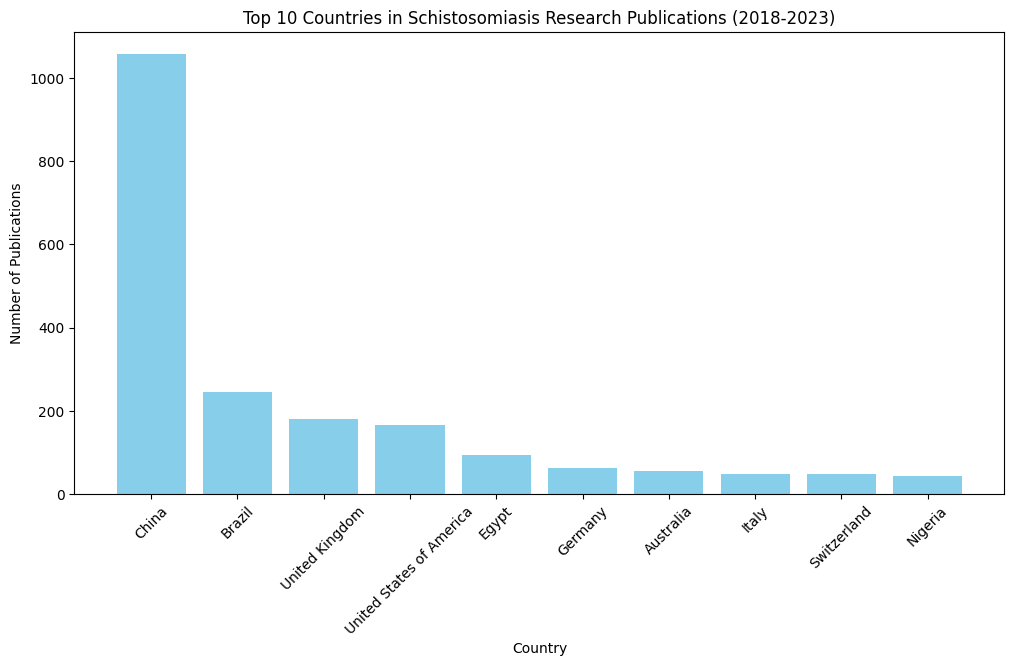

In [19]:
# Extracting top 10 countries for the graph
countries = country_stats_df['Country'].head(10)
publications = country_stats_df['Publications'].head(10)

# Creating and displaying the bar graph
plt.figure(figsize=(12, 6))
plt.bar(countries, publications, color='skyblue')
plt.title('Top 10 Countries in Schistosomiasis Research Publications (2018-2023)')
plt.xlabel('Country')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.show()

In [ ]:
! pip install geopandas

C:\Users\LYY\AppData\Local\Temp\ipykernel_4260\1298858863.py:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


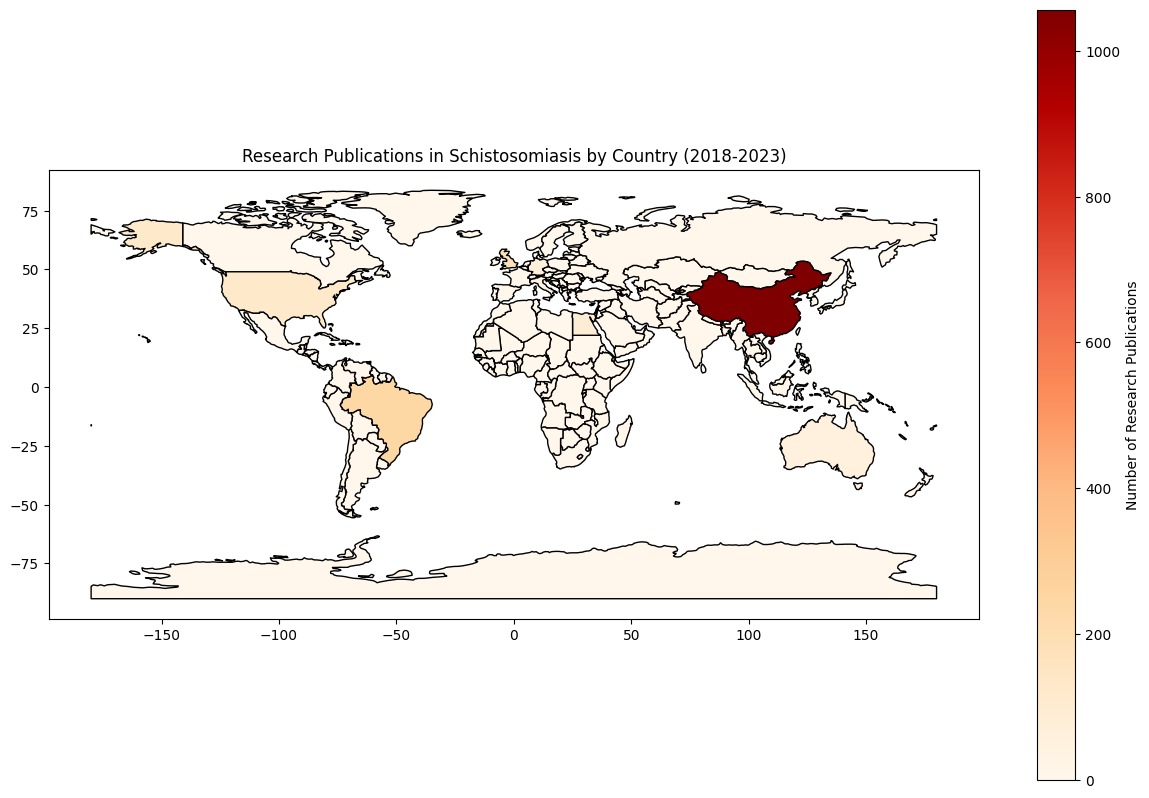

In [22]:
import geopandas as gpd
# Preparing data for the world map
specific_country_counts = {
    'China': 1057,
    'Brazil': 245,
    'United States of America': 123,
    'United Kingdom': 99 + 82,
    'Egypt': 93,
    'Germany': 62,
    'Australia': 56,
    'Italy': 48
}
specific_country_counts_df = pd.DataFrame(specific_country_counts.items(), columns=['country', 'count'])

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_map_specific_data = world.merge(specific_country_counts_df, left_on='name', right_on='country', how='left')
world_map_specific_data['count'] = world_map_specific_data['count'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_map_specific_data.plot(column='count', ax=ax, legend=True,
                             legend_kwds={'label': "Number of Research Publications"},
                             cmap='OrRd', edgecolor='black')
ax.set_title('Research Publications in Schistosomiasis by Country (2018-2023)')
plt.show()